In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('titanic/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df = df[['Embarked','Age','Fare','Sex','Survived']]

In [ ]:
df.head()

,Embarked,Age,Fare,Sex,Survived
0,S,22.0,7.2500,male,0
1,C,38.0,71.2833,female,1
2,S,26.0,7.9250,female,1
3,S,35.0,53.1000,female,1
4,S,35.0,8.0500,male,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.25)

In [ ]:
df.isnull().sum()

Embarked      2
Age         177
Fare          0
Sex           0
Survived      0
dtype: int64

### **Column Transformer**

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
transformer = ColumnTransformer(transformers = [
                                                ('tnf1',SimpleImputer(strategy = 'most_frequent'),['Embarked']),
                                                ('tnf2',SimpleImputer(),['Age']),
                                                ('tnf3',OrdinalEncoder(categories=[['male','female']]),['Sex']),
                                                ('tnf4',OneHotEncoder(sparse=False,drop='first'),['Embarked'])
],remainder = 'passthrough')

In [ ]:
X_train = transformer.fit_transform(X_train)

In [ ]:
X_test = transformer.transform(X_test)

In [ ]:
X_train.shape,X_test.shape,df.shape

((668, 7), (223, 7), (891, 5))

In [ ]:
print(X_train)

[['S' 29.599169741697416 0.0 ... 1.0 0.0 14.5]
 ['C' 4.0 1.0 ... 0.0 0.0 13.4167]
 ['S' 26.0 0.0 ... 1.0 0.0 8.05]
 ...
 ['S' 26.0 1.0 ... 1.0 0.0 26.0]
 ['C' 18.0 1.0 ... 0.0 0.0 227.525]
 ['S' 16.0 0.0 ... 1.0 0.0 26.0]]


In [ ]:
print(X_train[:,1:])

[[29.599169741697416 0.0 0.0 1.0 0.0 14.5]
 [4.0 1.0 0.0 0.0 0.0 13.4167]
 [26.0 0.0 0.0 1.0 0.0 8.05]
 ...
 [26.0 1.0 0.0 1.0 0.0 26.0]
 [18.0 1.0 0.0 0.0 0.0 227.525]
 [16.0 0.0 0.0 1.0 0.0 26.0]]


In [ ]:
X_train=X_train[:,1:]
X_test=X_test[:,1:]

## **Tranasformers**

#### **Sklearn provides 3 types of transformers**


1.   **Function transformer** : Log transform, Reciprocal transform, Square root transform or any custom transformer of our own
2.   **Power transformer** : Box-Cox transform, Yeo Johnson transform
3.   **Quantile transformer**



### **Why need data transformation?**

* the algorithm is more likely to be biased when the data distribution is skewed. Thus we convert the data into a normal distribution.
* transforming data into the same scale allows the algorithm to compare the relative relationship between data points better.
* We can use distplot and QQ plot to determine the data distribution.

#### **PDF and QQ plot of Age and Fare columns**

In [ ]:
from scipy import stats

In [ ]:
def plot_pdf_qq(data,col):
  plt.figure(figsize = (14,4))
  plt.subplot(121)
  sns.distplot(data[col])
  plt.title(col+' PDF')

  plt.subplot(122)
  stats.probplot(data['Age'],dist = 'norm',plot = plt)
  plt.title(col+' QQ plot')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


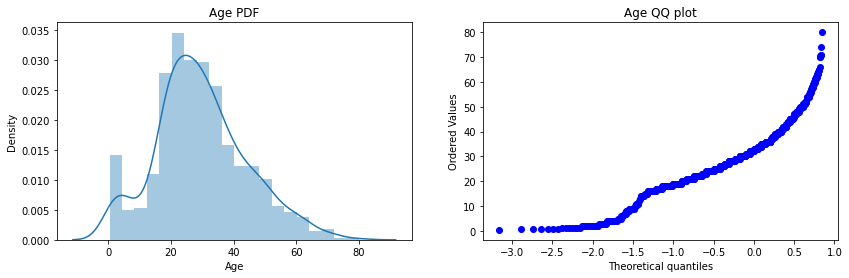

In [ ]:
plot_pdf_qq(df,'Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


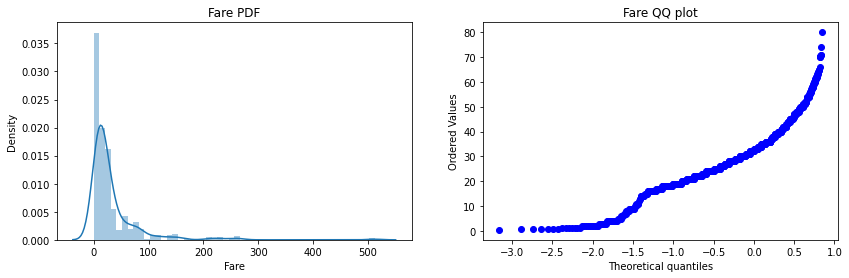

In [ ]:
plot_pdf_qq(df,'Fare')

**Training on normal data**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)

print("Accuracy of logistic regression: ", accuracy_score(Y_test,pred1))
print("Accuracy of decision tree classifier: ", accuracy_score(Y_test,pred2))

Accuracy of logistic regression:  0.7802690582959642
Accuracy of decision tree classifier:  0.7757847533632287


#### **Log transform**

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
log_trf = FunctionTransformer(np.log1p)

In [ ]:
X_train_log_transformed = log_trf.fit_transform(X_train.astype(float))
X_test_log_transformed = log_trf.transform(X_test.astype(float))

In [ ]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf1.fit(X_train_log_transformed,Y_train)
clf2.fit(X_train_log_transformed,Y_train)

pred1 = clf1.predict(X_test_log_transformed)
pred2 = clf2.predict(X_test_log_transformed)

print("Accuracy of logistic regression: ", accuracy_score(Y_test,pred1))
print("Accuracy of decision tree classifier: ", accuracy_score(Y_test,pred2))

Accuracy of logistic regression:  0.7802690582959642
Accuracy of decision tree classifier:  0.7937219730941704


**Accuracy of logistic regression increases but decision tree remains unaffected as tree based algorithms donot rely on distribution of data.**

#### **Use of function transformer to compare accuracies**

In [ ]:
def get_results(transform):
  X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.25)
  trf = ColumnTransformer(transformers = [
                                                ('tnf1',SimpleImputer(strategy = 'most_frequent'),['Embarked']),
                                                ('tnf2',SimpleImputer(),['Age']),
                                                ('tnf3',OrdinalEncoder(categories=[['male','female']]),['Sex']),
                                                ('tnf4',OneHotEncoder(sparse=False,drop='first'),['Embarked']),
                                                ('tnf5',FunctionTransformer(transform),['Fare'])
  ],remainder = 'passthrough')
  X_train_transformed = trf.fit_transform(X_train)
  X_test_transformed = trf.transform(X_test)

  # print(X_train)
  # print(X_train_transformed)

  X_train_transformed = X_train_transformed[:,1:]
  X_test_transformed = X_test_transformed[:,1:]

  clf1.fit(X_train_transformed,Y_train)
  clf2.fit(X_train_transformed,Y_train)

  pred1 = clf1.predict(X_test_transformed)
  pred2 = clf2.predict(X_test_transformed)

  print("Accuracy of logistic regression: ", accuracy_score(Y_test,pred1))
  print("Accuracy of decision tree classifier: ", accuracy_score(Y_test,pred2))

In [ ]:
get_results(lambda x: 1/(x+0.001))

Accuracy of logistic regression:  0.8251121076233184
Accuracy of decision tree classifier:  0.7757847533632287


In [ ]:
get_results(lambda x: np.log1p(x))

Accuracy of logistic regression:  0.8161434977578476
Accuracy of decision tree classifier:  0.7130044843049327


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
get_results(lambda x: x)

Accuracy of logistic regression:  0.7623318385650224
Accuracy of decision tree classifier:  0.7174887892376681


In [ ]:
get_results(lambda x: x**(1/2))

Accuracy of logistic regression:  0.7982062780269058
Accuracy of decision tree classifier:  0.7623318385650224


### **Box-Cox transformation**

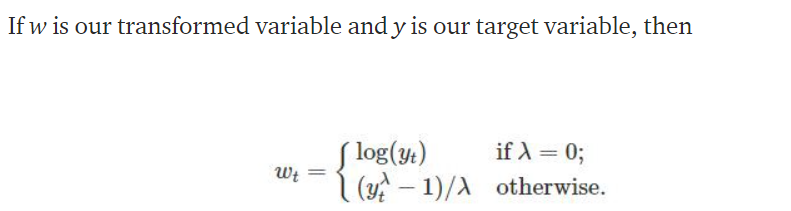

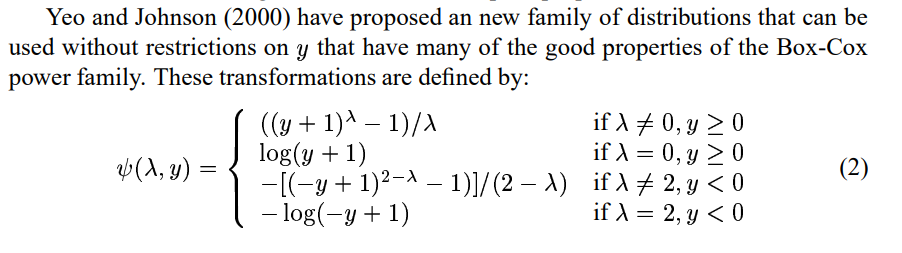

* **The value of lambda varies from -5 to 5, and the value of lambda for which the best normal distribution by means of maximum likelihood estimation or bayesian statistics is approximated is taken for the transformation.**

* **Negative values can not be transformed by this method, this problem is solved by the Yeo-Johnson transformation.**

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.25)
trf = ColumnTransformer(transformers = [
                                              ('tnf1',SimpleImputer(strategy = 'most_frequent'),['Embarked']),
                                              ('tnf2',SimpleImputer(),['Age']),
                                              ('tnf3',OrdinalEncoder(categories=[['male','female']]),['Sex']),
                                              ('tnf4',OneHotEncoder(sparse=False,drop='first'),['Embarked'])
],remainder = 'passthrough')
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

array([['S', 19.0, 1.0, ..., 1.0, 0.0, 26.0],
       ['S', 30.172325141776938, 0.0, ..., 1.0, 0.0, 7.25],
       ['S', 27.0, 0.0, ..., 1.0, 0.0, 13.0],
       ...,
       ['C', 30.172325141776938, 1.0, ..., 0.0, 0.0, 7.225],
       ['C', 20.0, 0.0, ..., 0.0, 0.0, 15.7417],
       ['S', 7.0, 0.0, ..., 1.0, 0.0, 39.6875]], dtype=object)

In [ ]:
def get_power_transform_results(X_train_transformed,X_test_transformed,transform):
  X_train_transformed = X_train_transformed[:,1:]
  X_test_transformed = X_test_transformed[:,1:]

  pt = PowerTransformer(method = transform)

  X_train_transformed = pt.fit_transform(X_train_transformed+0.0001)
  X_test_transformed = pt.transform(X_test_transformed+0.0001)

  clf1.fit(X_train_transformed,Y_train)
  clf2.fit(X_train_transformed,Y_train)

  pred1 = clf1.predict(X_test_transformed)
  pred2 = clf2.predict(X_test_transformed)

  print("Accuracy of logistic regression: ", accuracy_score(Y_test,pred1))
  print("Accuracy of decision tree classifier: ", accuracy_score(Y_test,pred2))

In [ ]:
get_power_transform_results(X_train_transformed,X_test_transformed,'box-cox')

Accuracy of logistic regression:  0.7847533632286996
Accuracy of decision tree classifier:  0.7802690582959642


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [ ]:
get_power_transform_results(X_train_transformed,X_test_transformed,'yeo-johnson')

Accuracy of logistic regression:  0.7802690582959642
Accuracy of decision tree classifier:  0.7757847533632287
